In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data
/content
done


In [0]:
pip install rouge

In [0]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np
from rouge import Rouge
from sklearn.cluster import KMeans
import random

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
print(tf.__version__)

2.0.0


In [0]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [0]:
extractiveRecords = pd.read_csv('/content/drive/My Drive/CSC522-ALDA/RK_ALDA_PROJ/Final Submission/K-Means/extractive.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
extractiveRecords.shape

(332133, 13)

In [0]:
def generateEmbedding(x):
  sentences=x.split('\n')
  sentences = list(filter(None, sentences))
  master_sentences=[]
  for sentence in sentences:
    innersentences = sentence.split(". ")
    innersentences = list(filter(None, innersentences))
    master_sentences += innersentences
  embedding = embed(master_sentences)["outputs"]
  return (master_sentences, embedding)


In [0]:
def calculateNumSentences(sentences, threshold, num_centers, sentence_embeddings):
  num_sentences = ((len(sentences))*threshold)/num_centers
  numpy_embed = sentence_embeddings.numpy()
  # print( numpy_embed)
  centres = []
  centres.append(list(numpy_embed[0]))
  centres.append(list(numpy_embed[-1]))
  r1 = random.randrange(1, len(numpy_embed)-2)
  r2=0
  while (True):
    r2= random.randrange(1, len(numpy_embed)-2)
    if(r2!=r1):
      break
  centres.append(list(numpy_embed[r1]))
  centres.append(list(numpy_embed[r2]))
  return num_sentences, np.array(centres)

In [0]:
gen_summaries=[]
for i in range(0,100000):
  print(i)
  sentences, embeddings = generateEmbedding(extractiveRecords['text'].iloc[i])
  summary = ""
  if len(embeddings) > 4:
    num_centers=4
    threshold = 0.4
    num_sentences, centres=calculateNumSentences(sentences, threshold, num_centers, embeddings)
    kmeans = KMeans(n_clusters=num_centers,random_state=0,init=centres).fit(embeddings)
    res=[]
    for c in range(0, num_centers):
      d = kmeans.transform(embeddings)[:, c]
      ind = np.argsort(d)[::-1][:int(num_sentences)]
      for i in range(len(ind)):
        res.append(ind[i])
    for i in sorted(set(res)):
      summary = summary+sentences[i]+" "
  else:
    for i in range(len(sentences)):
      summary = summary+sentences[i]+" "
  if (len(summary) == 0):
    for i in range(len(sentences)):
      summary = summary+sentences[i]+" "
  gen_summaries.append(summary)


 **************** ROGUE 1 ********************** 

0.22482953532841174


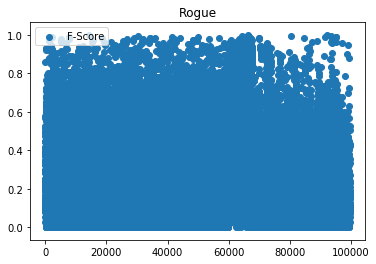

0.19875262527059936
0.19875262527059936


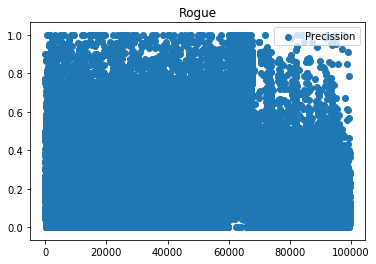

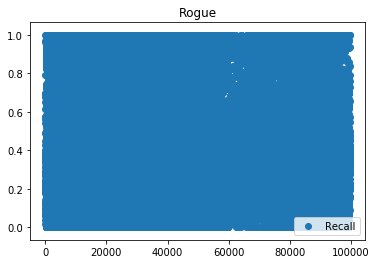


 **************** ROGUE 2 ********************** 

0.11612381356675708


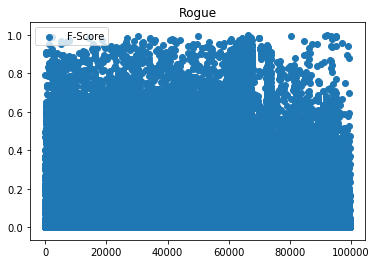

0.19875262527059936
0.19875262527059936


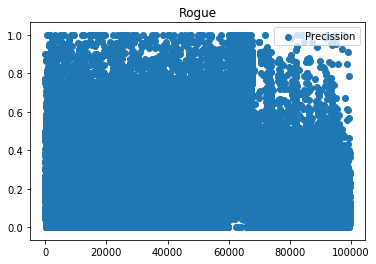

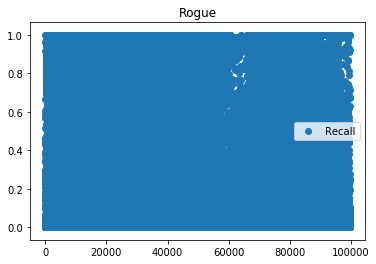


 **************** ROGUE L ********************** 

0.17047894704971914


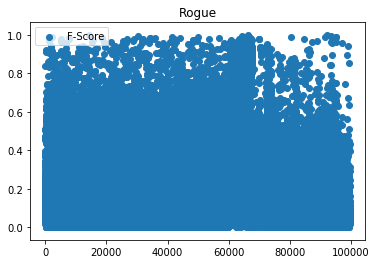

0.18346272480832806
0.18346272480832806


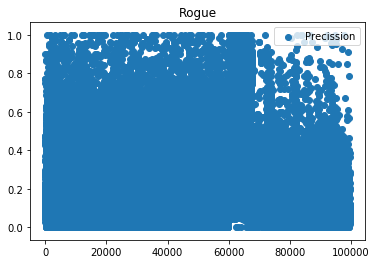

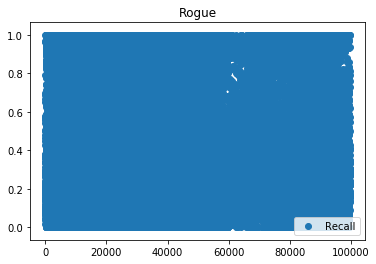

In [0]:

rouge = Rouge()
res_scores1=[]
res_scores2=[]
res_scoresL=[]
for i in  range(0,100000):
  if(len(gen_summaries[i])<6000 and len(extractiveRecords['summary'].iloc[i])<6000):
    scores = rouge.get_scores(gen_summaries[i], extractiveRecords['summary'].iloc[i])
    scores_1=scores[0]
    svalues_1 = list(scores_1.values())
    svalues_1 = svalues_1[0]
    res_scores1.append([svalues_1['f'], svalues_1['p'], svalues_1['r']])

    scores_2=scores[0]
    svalues_2 = list(scores_2.values())
    svalues_2 = svalues_2[1]
    # print(svalues)
    res_scores2.append([svalues_2['f'], svalues_2['p'], svalues_2['r']])

    scores_l=scores[0]
    svalues_l = list(scores_l.values())
    svalues_l = svalues_l[2]
    # print(svalues)
    res_scoresL.append([svalues_l['f'], svalues_l['p'], svalues_l['r']])

In [0]:
gen_summaries[50]

'"Tangled" is the latest Disney cartoon musical, with Mandy Moore providing the voice of fairy-tale princess Rapunzel "Tangled" not only shot past that mark but also challenged "Harry Potter" for the No 1 spot. "That was the last thing we were thinking of, but it sure is nice to be even thought of in that situation," Viane said "\'Potter\' is such a huge hit Jake Gyllenhaal and Anne Hathaway\'s romance "Love & Other Drugs" debuted at No "If you look at films like `Lord of the Rings,\' when you get to the last one, anticipation is just overwhelming." "The King\'s Speech" stars Colin Firth as British monarch George VI, father of Queen Elizabeth II, as he comes to power in 1936 while struggling to overcome a lifelong stammer and Canadian theaters, according to Hollywood.com 1 6 8 9 10 '

In [0]:
extractiveRecords['text'].iloc[50]

'LOS ANGELES -- A fairy-tale princess gave young wizard Harry Potter a run for his money at the weekend box office.\n\n"Harry Potter and the Deathly Hallows: Part 1" remained the No. 1 movie with $50.3 million over Thanksgiving weekend, closely followed by the animated musical "Tangled" with $49.1 million, according to studio estimates Sunday.\n\nThe next-to-last "Harry Potter" movie raised its domestic total to $220.4 million after just 10 days in theaters, according to distributor Warner Bros. The film also has taken in $389.2 million overseas, giving it a worldwide total of $609.6 million.\n\n"Tangled" is the latest Disney cartoon musical, with Mandy Moore providing the voice of fairy-tale princess Rapunzel. The movie raised its five-day total to $69 million since opening the day before Thanksgiving.\n\nWhile "Deathly Hallows" continued to work box-office magic, Disney\'s "Tangled" far exceeded industry expectations, delivering the second-biggest Thanksgiving debut ever behind "Toy 


 **************** ROGUE 1 ********************** 

0.22482953532841174


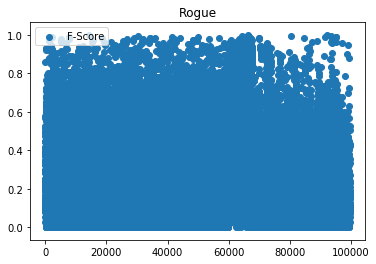

0.19875262527059936


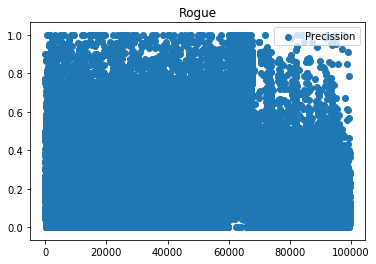

0.37710900142748927


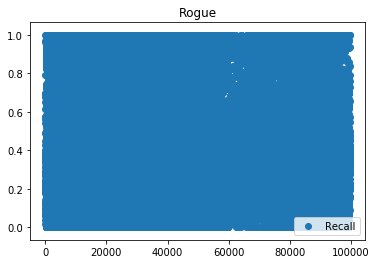


 **************** ROGUE 2 ********************** 

0.11612381356675708


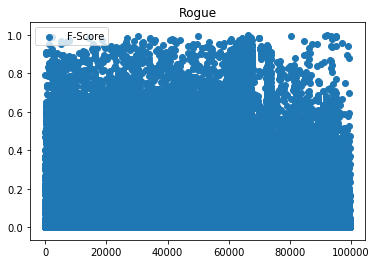

0.10419027067388564


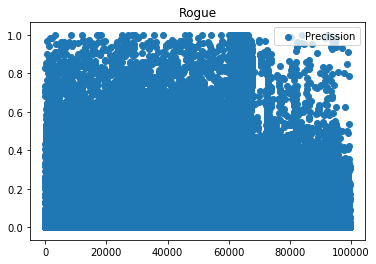

0.20919512674132018


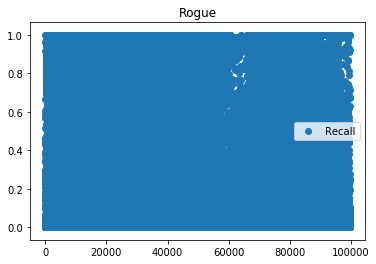


 **************** ROGUE L ********************** 

0.17047894704971914


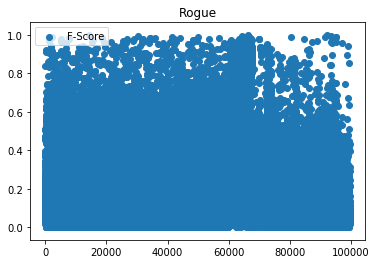

0.18346272480832806


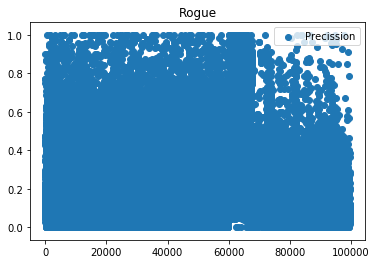

0.34766548182728835


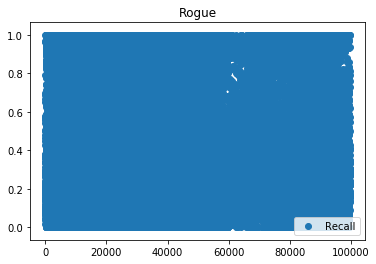

In [0]:
print("\n **************** ROGUE 1 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores1]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE 2 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores2]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE L ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scoresL]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Recall')
plt.legend()
plt.show()